In [36]:
import numpy as np
import matplotlib.pyplot as plt
import time
import bes_optimizer #importamos el algoritmo BES
import problem #importamos el problema
import json

In [37]:
#cargamos instancias como archivos JSON
with open('instancias.json', 'r') as archivo:
    instancias = json.load(archivo)
with open('caracteristicas_instancias.json', 'r') as archivo:
    caracteristicas = json.load(archivo)

In [38]:
#parámetros
pop_size=15 #tamaño de la poblacion
a_factor=8 #valor que oscila entre [5,10]
R_factor=1 #Radio de search
alpha=1.5 #valor que oscila entre [1.5-2]
c1=2
c2=2
maxIter=50 #maximo numero de iteraciones

## Select space eq
$P_{new}=P_{best}+{\alpha}r(P_{mean}-P_{i})$

## Search in space eq
$P_{new}=P_{i}+y(i)(P_{i}-P_{i+1})+x(i)(P_{i}-P_{mean})$

## Swoop
$P_{new}=randP_{best}+x1(i)(P_{i}-c1P_{mean})+y1(i)(P_{i}-c2P_{best})$

In [39]:
#seleccionamo una instancia o más
lista_instancias=['u250_00','u250_01']
#seleccionamos el número de ejecuciones del algoritmo
#cada ejecución tiene asociada una semilla (seed)
numero_ejecuciones=30
#almacenamos los valores encontrados
datos={}
for i in lista_instancias:
    tiempo=[]
    optimo=[]
    optimo_time=[]
    for j in range(0,numero_ejecuciones,1):
        seed=j
        [c,nVars,optimo_global]=caracteristicas[i]
        weight = instancias[i]
        P_g_time_final,P_g_time,execution_time=bes_optimizer.BES(weight,c,nVars,pop_size,a_factor,R_factor,alpha,low,high,c1,c2,maxIter,seed)
        optimo.append(P_g_time_final)
        optimo_time.append(P_g_time)
        tiempo.append(execution_time)
    datos[i]=[optimo_time,tiempo,optimo]

    

{'u250_00': [[[112, 112, 111, 105, 105, 105, 105, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104], [106, 106, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104], [105, 105, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104], [105, 105, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104,

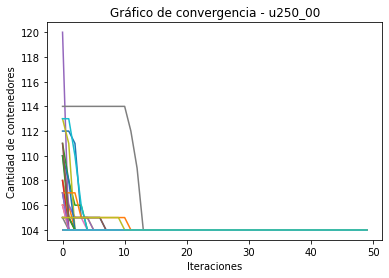

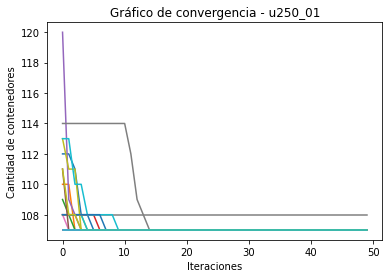

In [41]:
# Iterar sobre los datos y crear los gráficos
for instancia, lista_datos in datos.items():
    fig, ax = plt.subplots()
    for i, sublista in enumerate(lista_datos[0]):
        ax.plot(sublista)
    ax.set_title('Gráfico de convergencia - ' + instancia)
    ax.set_xlabel('Iteraciones')
    ax.set_ylabel('Cantidad de contenedores')
    plt.show()

